In [1]:
from torch import nn
import torch
import gym
from collections import deque
import itertools
import numpy as np
import random
import torch.nn.functional as F
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
ENV_Name='CartPole-v0'
torch.manual_seed(2)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
env = gym.make(ENV_Name)
env.seed(0)
env.env.book_or_nips = 'nips'

/home/imaging/anaconda3/lib/python3.11/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/home/imaging/anaconda3/lib/python3.11/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/imaging/anaconda3/lib/python3.11/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/imaging/anaconda3/lib/python3.11/site-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be remove

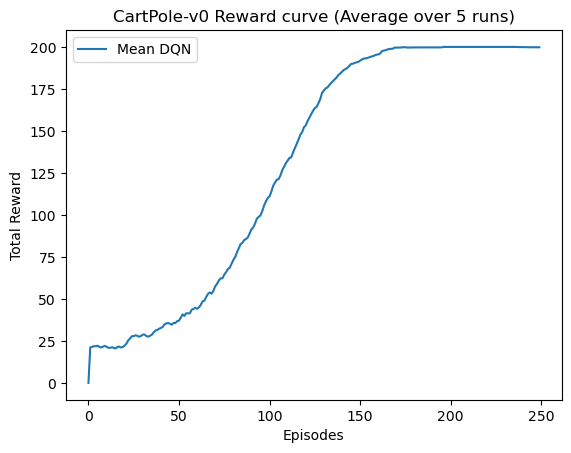

In [3]:
Iterations =5
Mean_Flag = True
mean_Plot_array = []
for k in range(Iterations):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    mean_Plot_array.append(loaded_array)

mean_scrs = np.mean(mean_Plot_array,axis = 0)

plt.plot(mean_scrs,label='Mean DQN')
plt.legend()
plt.ylabel ('Total Reward')
plt.xlabel('Episodes')
plt.title(f'{ENV_Name} Reward curve (Average over {Iterations} runs)')
plt.savefig('Mean_DQN_CartPole-v0.png')
plt.show()

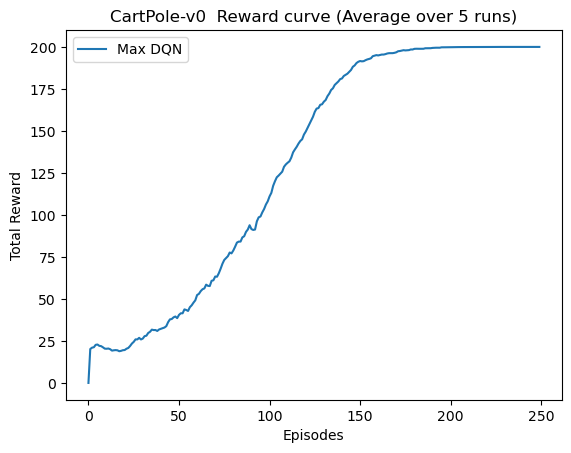

In [4]:
Mean_Flag = False
max_Plot_array = []
for k in range(Iterations):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    max_Plot_array.append(loaded_array)


max_scrs = np.mean(max_Plot_array,axis = 0)

plt.plot(max_scrs,label='Max DQN')
plt.legend()
plt.ylabel ('Total Reward')
plt.xlabel('Episodes')
plt.title(f'{ENV_Name}  Reward curve (Average over {Iterations} runs)')
plt.savefig('Max_DQN_CartPole-v0.png')
plt.show()

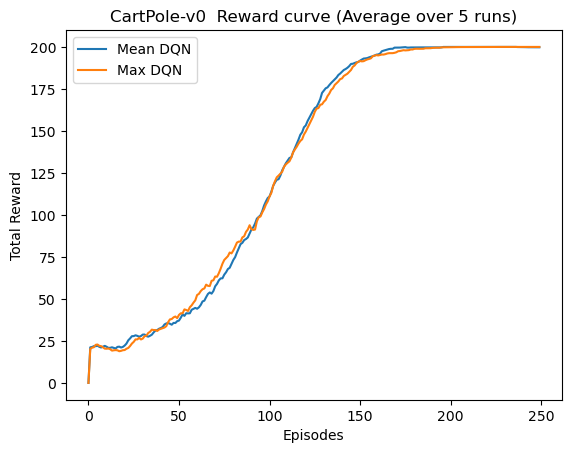

In [5]:
Mean_Flag = True
mean_Plot_array = []
for k in range(Iterations):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    mean_Plot_array.append(loaded_array)

Mean_Flag = False
max_Plot_array = []
for k in range(Iterations):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    max_Plot_array.append(loaded_array)

mean_scrs = np.mean(mean_Plot_array,axis = 0)
max_scrs = np.mean(max_Plot_array,axis = 0)

plt.plot(mean_scrs,label='Mean DQN')
plt.plot(max_scrs,label='Max DQN')
plt.legend()
plt.ylabel ('Total Reward')
plt.xlabel('Episodes')
plt.title(f'{ENV_Name}  Reward curve (Average over {Iterations} runs)')
plt.savefig('DQN_CartPole-v0.png')
plt.show()

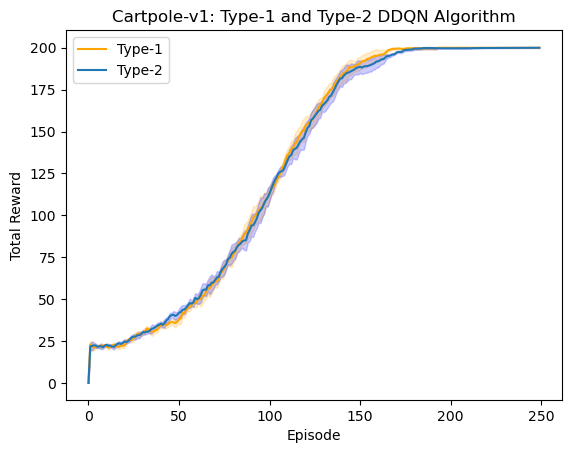

In [3]:
Mean_Flag = True
mean_Plot_array = []
for k in range(5):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    mean_Plot_array.append(loaded_array)

Mean_Flag = False
max_Plot_array = []
for k in range(5):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    max_Plot_array.append(loaded_array)

mean_scrs = np.mean(mean_Plot_array,axis = 0)
std_mean_scrs = np.std(mean_Plot_array, axis=0)

max_scrs = np.mean(max_Plot_array,axis = 0)
std_max_scrs = np.std(mean_Plot_array,axis= 0)



    # Plot mean rewards with different colors
plt.plot(mean_scrs, label='Type-1', color='orange')
plt.plot(max_scrs, label='Type-2')

# Plot shaded regions for variance (mean +/- std) for both cases
plt.fill_between(range(len(mean_scrs)),
                 mean_scrs - std_mean_scrs,
                 mean_scrs + std_mean_scrs,
                 color='orange', alpha=0.2)

plt.fill_between(range(len(max_scrs)),
                 max_scrs - std_max_scrs,
                 max_scrs + std_max_scrs,
                 color='blue', alpha=0.2)

# Customize plot
plt.title("Cartpole-v1: Type-1 and Type-2 DDQN Algorithm")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.savefig('DQN_CartPole-std.png')
plt.show()